# Data Cleaning

## Import required packages

In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Define functions

Since this roject involves working with two datasets, it makes sense to define some functions to perform repetitive tasks, and avoid redundancy.

In [790]:
def read_data(input_csv):
    '''
    Reads input_csv into a pandas dataframe, and prints the shape of the dataset
    '''
    
    data = pd.read_csv(input_csv)
    pd.set_option('max_columns', 150)
    print(data.shape)
    return data



def clean_data(input_df):
    '''
    Takes in a pandas dataframe, input_df, as the input, and returns a pandas dataframe.
    Descriptive columns are removed and anomalous values replaced/removed
    '''
    
    # Replace meaningless age values with mean age 
    input_df.loc[(input_df['What is your age?'] > 90), 'What is your age?'] = int(input_df['What is your age?'].mean())
    input_df.loc[(input_df['What is your age?'] < 18), 'What is your age?'] = int(input_df['What is your age?'].mean())
    input_df['What is your age?'].fillna(int(input_df['What is your age?'].mean()), inplace=True)
    
    # Drop columns with descriptive answers
    input_df = input_df[input_df.columns.drop(list(input_df.filter(regex='Why')))]
    input_df = input_df[input_df.columns.drop(list(input_df.filter(regex='Describe')))]
    input_df = input_df[input_df.columns.drop(list(input_df.filter(regex='describe')))]
    input_df = input_df[input_df.columns.drop(list(input_df.filter(regex='tell')))]

    # Group genders into three categories
    input_df['What is your gender?'] = input_df['What is your gender?'].replace([
        'Male', 'male', 'M', 'm', 'Man', 'Male ', 'male ', 'Cis-male', 'Cis male',
        'Cis Male', 'Mail', 'mail', 'cis male', 'cis-male',
        "male (hey this is the tech industry you're talking about)", 'God King of the Valajar',
        'Male, cis', 'cis male ', 'cis hetero male', 'dude', 'Dude', 'man', 'Male (cis)',
        'cis man', 'cisdude', 'Male.', 'Sex is male', 
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ", 
        'Malr', 'Male (trans, FtM)', 'MALE', 'M|'], 'Male')
    input_df['What is your gender?'] = input_df['What is your gender?'].replace([
        'Female', 'female', 'F', 'f', 'Woman', 'Female ', 'fem', 'woman', 'Woman-identified',
        'cis female', 'Cis female ', 'femail', 'F, cisgender', 'Female (cis)', 'female (cis)',
        'My sex is female.', 'femalw', 'cis-Female', 'Female (cis) ', 'female (cisgender)',
        'trans woman', 'female ', 'Transitioned, M2F', 'Cis female', 'I identify as female.',
        'fm', 'mtf', 'Cis-woman', 'Female assigned at birth ', ' Female', 'Transgender woman',
        'Female (props for making this a freeform field, though)', 'Cisgender Female', 'AFAB',
        'genderqueer woman', 'Cis female ', 'female/woman'], 'Female')
    input_df['What is your gender?'] = input_df['What is your gender?'].replace([
        'Nonbinary', 'sometimes', 'Agender/genderfluid', 'Genderqueer/Other', 'Genderqueer/0ther',
        'Non binary', 'Male-ish', 'uhhhhhhhhh fem genderqueer?', 'Female-ish', 'Genderfluid',
        'Genderqueer/non-binary', 'Contextual', 'Non-binary', 'None', 'male/androgynous',
        'male/androgynous ', 'Genderqueer demigirl', 'Transfeminine', 'nonbinary', '\-',
        'non-binary', 'Agender', 'Genderqueer', 'genderqueer', 'Male/genderqueer', 
        'Androgynous', 'Female or Multi-Gender Femme', 'Other', 'Queer', 'nb masculine', 
        'none of your business', 'Human', 'male 9:1 female, roughly', 'Genderfluid (born female)', 
        'Other/Transfeminine', 'Enby', 'Fluid', 'Bigender', 'Genderflux demi-girl', 
        'female-bodied; no feelings about gender', 'Unicorn', 'human', np.NaN], 'Genderqueer/Other')
    
    #Rename key columns to simplify access later
    input_df.rename(columns = {
        'What is your age?' : 'Age',
        'What is your gender?' : 'Gender',
        '<strong>Are you self-employed?</strong>' : 'Is self-employed',
        'Are you self-employed?' : 'Is self-employed',
        'Is your employer primarily a tech company/organization?' : 'Works at a tech company',
        'Is your primary role within your company related to tech/IT?' : 'Works in a tech/IT role',
        'Do you currently have a mental health disorder?' : 'Has MHD'
    }, inplace=True)
    
    return input_df



def columns_to_dict(input_df, column_names_list, make_plot=True):
    ''' 
    Takes an input DataFrame and returns a bar plot based on a list of column names, column_names_list.
    If the make_plot parameter is False, it returns a dictionary of the columns and respective count values.
    '''
    temp_dict = {}
    temp_df = pd.DataFrame()
    for column in column_names_list:
        temp_df[column] = input_df[column].fillna(value=0)
        temp_dict[column] = temp_df[column].count() - temp_df[column].value_counts()[0]
        
    if make_plot == False:
        return temp_dict
    else:
        temp_df = temp_df.from_dict(temp_dict, orient='index')
        temp_df.reset_index(level=0, inplace=True)
        temp_df.rename(columns={'index' : 'Type', 0 : 'Count'}, inplace=True)
        temp_df.sort_values("Count", ascending=False, inplace=True)
        sns.barplot(x="Count", y="Type", data=temp_df, color="b")
        


## Read in data sets

In [791]:
data_2016 = read_data('mental-health-2016.csv')

(1433, 63)


In [792]:
data_2017 = read_data('mental-health-2017.csv')

(756, 123)


#### The datasets have different columns; this needs to be taken into account during analysis

In [793]:
data_2016.describe(include='all')

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [794]:
data_2017.describe(include='all')
#data_2017.head(30)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address yo

### Findings
There are some strange values in the datasets. For instance, the maximum age in data_2016 is 323, and the minimum is 3.
 - Instead of dropping these outliers, I decided to replace these ages with the mean age.

There are over 50 gender values in both data sets. This is because the survey participants were allowed to type their genders.
 - I manually replaced the genders into three categories: 'Male', 'Female', and 'Other', while trying my best to be respectful of the responses.

Descriptive answers need to be examined manually, and it make sense to drop these columns for the preliminary analysis.

In [795]:
data_2016 = clean_data(data_2016)
data_2017 = clean_data(data_2017)

# Check the age column
#data_2016['What is your age?'].max()
#data_2017['What is your age?'].value_counts

# Check the gender columns
#data_2016['What is your gender?'].unique()
#data_2017['What is your gender?'].unique()

data_2017.shape

(756, 111)

# Visualization

- It makes sense to begin the analysis with an understanding of our demographics: What are the age groups, genders, and job types?
- Next, what are the most common mental health disorders tech employees face?
- What are the general perceptions about mental health among employees?
- Finally, how are tech companies attempting to help employees?

This visualization is done on the 2017 data set (`data_2017`), and later, some trends can be observed by comparing with hte 2016 data set.

## Identifying columns of interest

In [796]:
employee_type = [
    'Is self-employed',
    'Works at a tech company',
    'Works in a tech/IT role'
]

# Mental health disorders are split into columns for data_2017, with three columns for each disorder. 
# The columns are named as <disorder name>, <disorder name>.1, and <disorder name>.2
# The first does not contain useful info.
# These are initially collected as separqate lists, and will be merged into a common dictionary at a later time.
# It is unclear which columns are utilized for which response, so there may be some discrepancies in the analysis.
# This will be addressed later in the code.
disorders_possibly = [
    'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
    'Mood Disorder (Depression, Bipolar Disorder, etc).1',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1',
    'Eating Disorder (Anorexia, Bulimia, etc).1',
    'Attention Deficit Hyperactivity Disorder.1',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
    'Obsessive-Compulsive Disorder.1',
    'Stress Response Syndromes.1',
    'Dissociative Disorder.1',
    'Substance Use Disorder.1',
    'Addictive Disorder.1',
    'Other.1'
]
disorders_diagnosed = [
    'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
    'Mood Disorder (Depression, Bipolar Disorder, etc).2',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2',
    'Eating Disorder (Anorexia, Bulimia, etc).2',
    'Attention Deficit Hyperactivity Disorder.2',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc).2',
    'Obsessive-Compulsive Disorder.2',
    'Post-traumatic Stress Disorder.1',
    'Stress Response Syndromes.2',
    'Dissociative Disorder.2',
    'Substance Use Disorder.2',
    'Addictive Disorder.2',
    'Other.2'
]


## Distribution of employee ages
The ages distribution is faily similar over all, and across the genders, with the majority of employee falling in the 25-35 year age range.

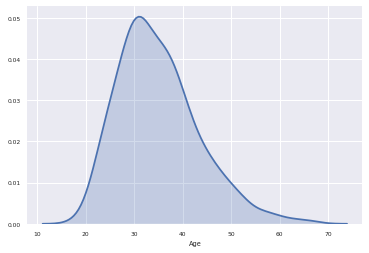

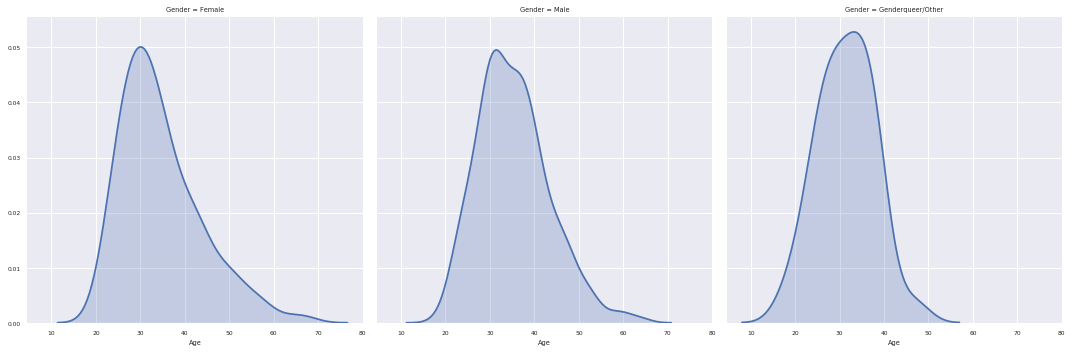

In [797]:
sns.kdeplot(data_2017['Age'], shade = True, legend = False)
sns.despine(bottom=True, left=True)
plt.xlabel('Age')
g = sns.FacetGrid(data_2017, col='Gender', size=5)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(bottom=True, left=True)
plt.show()

## Distribution of employee types

- The majority of employees work in a tech company, and a small number are self employed.
- Regardless of employment time, most of the employees work in a tech role (~600 out of the 756 survey respondents).

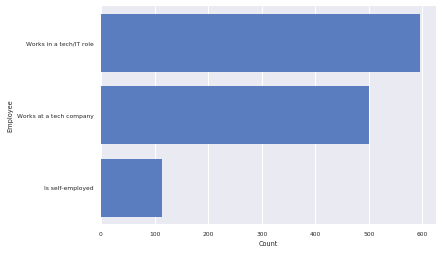

In [798]:
columns_to_dict(data_2017, employee_type)
plt.ylabel('Employee')
plt.show()

## Gender distribution

Tech jobs are mostly dominated by males.

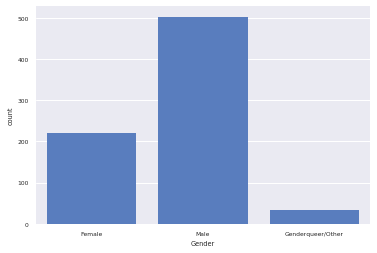

In [799]:
sns.countplot(data_2017['Gender'], color='b')
sns.despine(bottom=True, left=True)
plt.show()

## Overall distribution

 - As seen above, the age of the employees is generally between 25 and 35
 - There seem to be more men who have (or potentially have) mental health disorders than those who do not. 
 - Among females, mental health disorders are definitely more common.
 - Proportionally, mental health disorders are also more prevalent in those who identify as genderqueer/other.

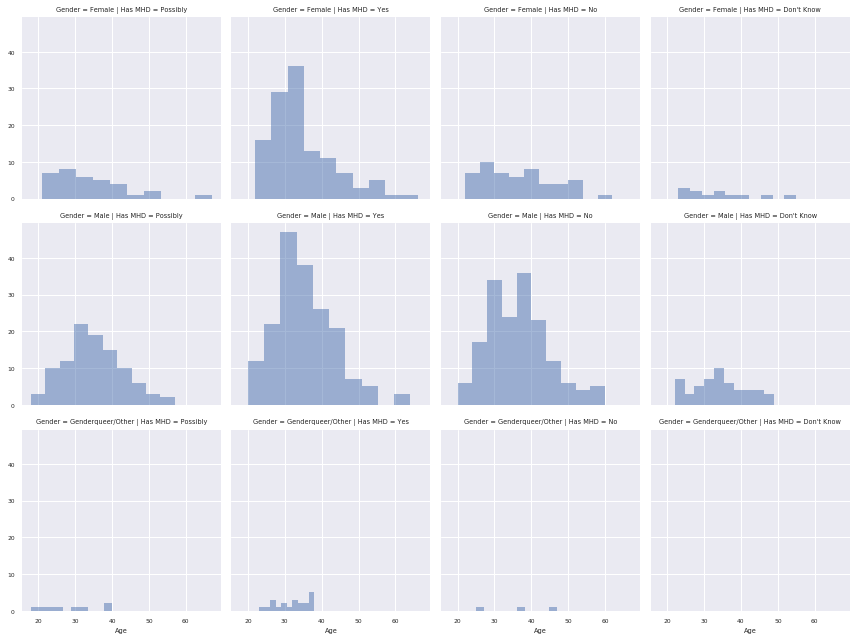

In [800]:
g = sns.FacetGrid(data_2017, row='Gender', col='Has MHD')
#sns.set(font_scale=.6)
#g.map(sns.kdeplot, 'Age', shade=True)
g.map(plt.hist, 'Age', alpha=0.5, bins=10)
sns.despine(bottom=True, left=True)
plt.show()

# Getting a warning with numpy which doesn't seem to affect the results. Removing warning for readability.
import warnings
warnings.filterwarnings('ignore')

## Common mental health disorders

- Among those medically diagnosed, the most common mental health disorders are mood disorders, followed by anxiety disorders.
- Among employees who think they may *possibly* have a mental health health disorder, the most common ones are anxiety disorders, followed by mood disorders.
- PTSD and ADHD are fairly prevalent in both groups

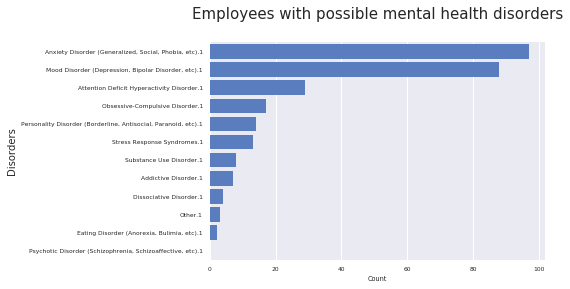

In [801]:
columns_to_dict(data_2017, disorders_possibly)
plt.ylabel("Disorders", size=10)
plt.title("Employees with possible mental health disorders\n", size = 15)
plt.show()

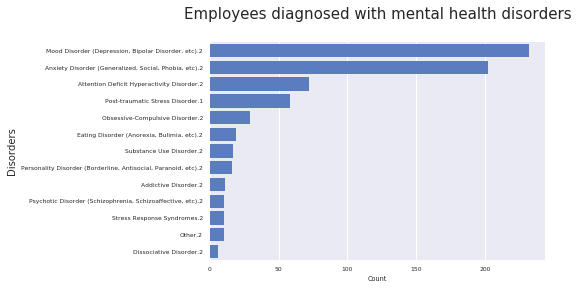

In [802]:
columns_to_dict(data_2017, disorders_diagnosed)
plt.ylabel("Disorders", size=10)
plt.title("Employees diagnosed with mental health disorders\n", size = 15)
plt.show()

## Identifying columns of interest

In [817]:
cols = [
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
    'Would you bring up your mental health with a potential employer in an interview?',
    'Are you openly identified at work as a person with a mental health issue?',
    'Has being identified as a person with a mental health issue affected your career?',
    'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>',
    'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>',    
    'Did you ever discuss your mental health with a previous coworker(s)?',
    'Did you ever discuss your mental health with your previous employer?',
    'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
    'Overall, how much importance did your previous employer place on physical health?',
    'Overall, how much importance did your previous employer place on mental health?',
    'Overall, how well do you think the tech industry supports employees with mental health issues?',
    
]

## Interviews: Willingness to bring up mental health issues

- Men are about equally likely to bring up physical health issues, but *highly unlinely* to bring up mental health issues.
- Women are are fairly unlikely to bring up physical health issues, but *highly unlikely* to bring up mental health issues.
- There isn't enough data to draw any conclusions about genderqeer individuals, but they seem less likely to bring up mental health issues

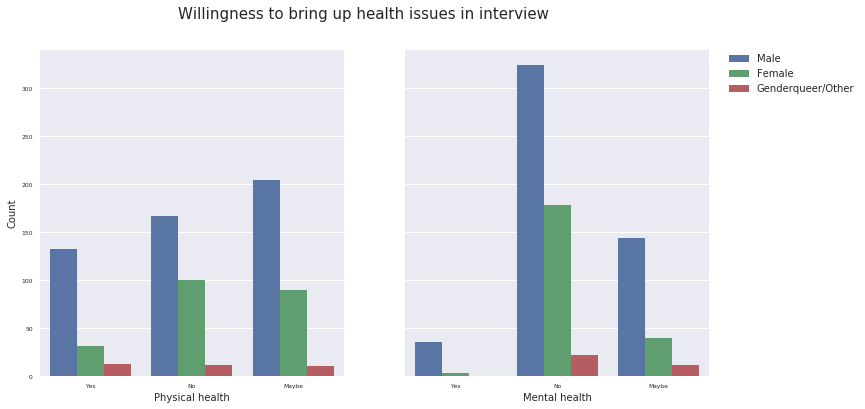

In [804]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
g1 = sns.countplot(x=cols[0], hue='Gender', data=data_2017, ax=ax1, order = ['Yes', 'No', 'Maybe'], hue_order=['Male', 'Female', 'Genderqueer/Other'])
g2 = sns.countplot(x=cols[1], hue='Gender', data=data_2017, ax=ax2, order = ['Yes', 'No', 'Maybe'], hue_order=['Male', 'Female', 'Genderqueer/Other'])
g1.legend_.remove()
g1.set_xlabel("Physical health", size=10)
g2.set_xlabel("Mental health", size=10)
g1.set_ylabel("Count", size=10)
g2.set_ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.suptitle("Willingness to bring up health issues in interview", size=15)
plt.show()

## Perceptions of mental health in the workplace
- Across the genders, idividuals are highly unlikely to indentify themsleves as having a mental health issue at work.
- Men are less likely to do so than women.
- On the positive side, among those open about having a MHD, the majority do not like it has affected their career negatively.
- The nature of reactions to coworkers revealing their MHDs is not the reason people do not reveal their own MHDs. This may indicate that companies are at least attempting to provide support to those with MHDs. 

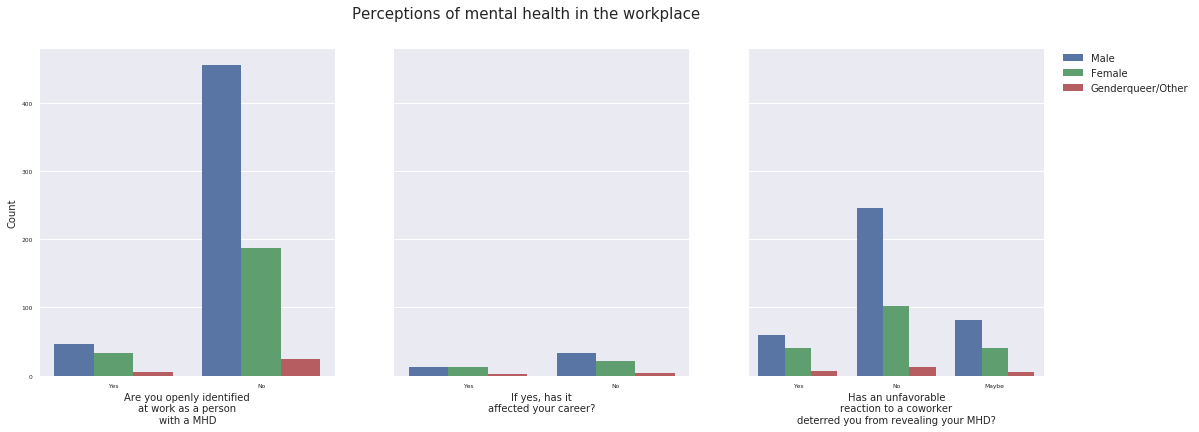

In [805]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,6))
g1 = sns.countplot(x=cols[2], hue='Gender', data=data_2017, ax=ax1,
                   order = [1, 0],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g2 = sns.countplot(x=cols[3], hue='Gender', data=data_2017, ax=ax2,
                   order = [1, 0],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g3 = sns.countplot(x=cols[4], hue='Gender', data=data_2017, ax=ax3,
                   order = ['Yes', 'No', 'Maybe'],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])

g1.legend_.remove()
g2.legend_.remove()
g1.set_xlabel("Are you openly identified\nat work as a person\nwith a MHD", size=10)
g2.set_xlabel("If yes, has it\naffected your career?", size=10)
g3.set_xlabel("Has an unfavorable\nreaction to a coworker\ndeterred you from revealing your MHD?", size=10)
g1.set_ylabel("Count", size=10)
g2.set_ylabel("")
g3.set_ylabel("")
g1.set(xticklabels=['Yes','No'])
g2.set(xticklabels=['Yes','No'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.suptitle("Perceptions of mental health in the workplace", size=15)
plt.show()

## Does effective treatment affect the quality of work

- When not being treated, most employees feel like having a MHD affects their work often. 
- However, if undergoing effective treatment, most employees feel like their MHDs affect their work sometimes or rarely. 
- These trends hold true across all the genders

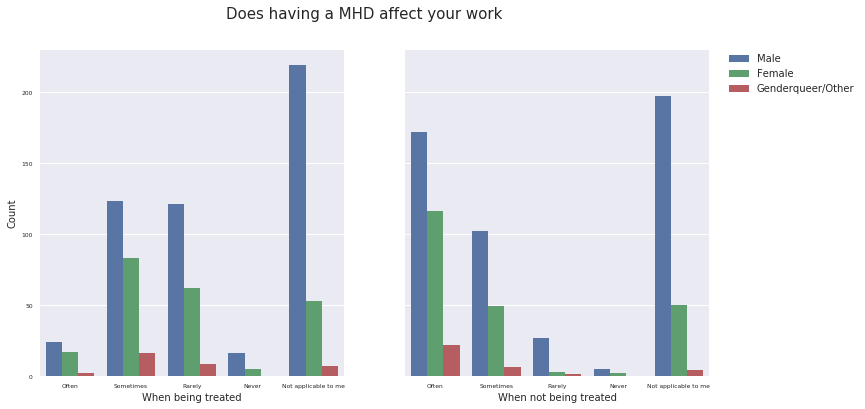

In [806]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
g1 = sns.countplot(x=cols[5], hue='Gender', data=data_2017, ax=ax1,
                   order = ['Often','Sometimes','Rarely','Never','Not applicable to me'],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g2 = sns.countplot(x=cols[6], hue='Gender', data=data_2017, ax=ax2,
                   order = ['Often','Sometimes','Rarely','Never','Not applicable to me'],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g1.legend_.remove()
g1.set_xlabel("When being treated", size=10)
g2.set_xlabel("When not being treated", size=10)
g1.set_ylabel("Count", size=10)
g2.set_ylabel("")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.suptitle("Does having a MHD affect your work", size=15)
plt.show()

## Willingness to discuss mental health issues
- Across all gender categories, employees are unlikely to discuss mental health issues with coworkers or employers.
- However, employees are more willing to discuss these issues with *some* of their direct supervisors.
- Surprisingly, males are more likely than women to discuss these issues with cowerkers.

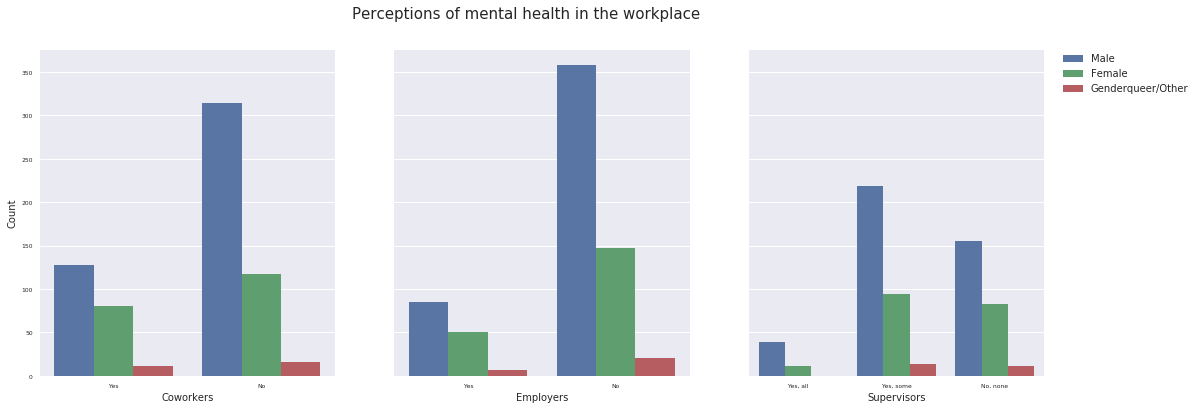

In [813]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,6))
g1 = sns.countplot(x=cols[7], hue='Gender', data=data_2017, ax=ax1,
                   order = [1,0],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g2 = sns.countplot(x=cols[8], hue='Gender', data=data_2017, ax=ax2,
                   order = [1, 0],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])
g3 = sns.countplot(x=cols[9], hue='Gender', data=data_2017, ax=ax3,
                   order = ['Yes, all of my previous supervisors','Some of my previous supervisors','No, none of my previous supervisors'],
                   hue_order=['Male', 'Female', 'Genderqueer/Other'])

g1.legend_.remove()
g2.legend_.remove()
g1.set_xlabel("Coworkers", size=10)
g2.set_xlabel("Employers", size=10)
g3.set_xlabel("Supervisors", size=10)
g1.set_ylabel("Count", size=10)
g2.set_ylabel("")
g3.set_ylabel("")
g1.set(xticklabels=['Yes','No'])
g2.set(xticklabels=['Yes','No'])
g3.set(xticklabels=['Yes, all','Yes, some','No, none'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
plt.suptitle("Perceptions of mental health in the workplace", size=15)
plt.show()

In [821]:
data_2017[cols[10]].value_counts()

5.0     147
7.0     106
6.0      84
8.0      81
0.0      48
4.0      47
3.0      44
2.0      34
9.0      30
10.0     29
1.0      17
Name: Overall, how much importance did your previous employer place on physical health?, dtype: int64